<a href="https://colab.research.google.com/github/ssv273/Neural_Univesity/blob/main/hw_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model # Импортируем модели keras: Model
from tensorflow.keras.layers import Input, Conv2DTranspose, concatenate, Activation, MaxPooling2D, Conv2D, BatchNormalization # Импортируем стандартные слои keras
from tensorflow.keras import backend as K # Импортируем модуль backend keras'а
from tensorflow.keras.optimizers import Adam # Импортируем оптимизатор Adam
from tensorflow.keras import utils # Импортируем модуль utils библиотеки tensorflow.keras для получения OHE-представления
from google.colab import files # Импортируем Модуль files для работы с файлами
import matplotlib.pyplot as plt # Импортируем модуль pyplot библиотеки matplotlib для построения графиков
from tensorflow.keras.preprocessing import image # Импортируем модуль image для работы с изображениями
import numpy as np # Импортируем библиотеку numpy
from sklearn.model_selection import train_test_split
import time
import random
import os # Импортируем библиотеку os для раоты с фаловой системой
from PIL import Image # импортируем модель Image для работы с изображениями

In [2]:
!unzip -q "/content/drive/MyDrive/вода.zip" -d /content/water #Указываем путь к базе в Google Drive

In [3]:
# Глобальные параметры
img_width = 304 # Ширина уменьшенной картинки 
img_height = 400 # Высота уменьшенной картинки 
num_classes = 2 # Задаем количество классов на изображении
number_of_images = 2000
directory = '/content/water/water_v2/water_v2/' # Указываем путь к обучающей выборке с оригинальными изображения
JPEG_directory = 'JPEGImages' # Название папки с изображениями
annotations_directory = 'Annotations' # Название папки с аннотациями

In [4]:
imdir = os.listdir(directory+JPEG_directory)
counter = 0
good_dirs = []
for folder in imdir:
    if len(os.listdir(directory+JPEG_directory + "/" + folder)) == len(os.listdir(directory+annotations_directory + "/" + folder)):
        print(folder, len(os.listdir(directory+JPEG_directory + "/" + folder)))
        counter += len(os.listdir(directory+JPEG_directory + "/" + folder))
        good_dirs.append(folder)
print(counter)

buffalo0_small 28
stream1 24
canal0 10
stream3_small 28
boston_harbor2_small_rois 27
stream0 15
ADE20K 1888
river_segs 300
stream4 40
2360


In [5]:
imdir = os.listdir(directory+annotations_directory)
counter = 0
for folder in imdir:
    print(folder, len(os.listdir(directory+annotations_directory + "/" + folder)))
    counter += len(os.listdir(directory+annotations_directory + "/" + folder))
print(counter)

buffalo0_small 28
stream1 24
cockermouth 6
mexico_beach_clip0 6
evesham-lock 6
worcester 6
galway-city 6
bewdley 6
canal0 10
holiday_inn_clip0 6
auldgirth 6
keswick_greta 6
stream3_small 28
dublin 6
boston_harbor2_small_rois 27
stream0 15
ADE20K 1888
holmrook 6
river_segs 300
gulf_crest 7
aberlour 6
stream4 40
2439


In [6]:
train_images = [] # Создаем пустой список для хранений оригинльных изображений обучающей выборки
cur_time = time.time() # Засекаем текущее время
for folder in good_dirs:
    for filename in sorted(os.listdir(directory+JPEG_directory + "/" + folder)): # Проходим по всем файлам в каталоге по указанному пути  
        if len(train_images) < number_of_images: 
            train_images.append(image.img_to_array(image.load_img(directory+JPEG_directory + "/" + folder + "/" + filename, target_size=(img_width, img_height)))) # Читаем очередную картинку и добавляем ее в список изображения с указанным target_size                                                      
xTrain = np.array(train_images) # Переводим в numpy
print ('Обучающая выборка загружена. Время загрузки: ', round(time.time() - cur_time, 2), 'c', sep='') # Отображаем время загрузки картинок обучающей выборки
print ('Количество изображений: ', xTrain.shape[0]) # Отображаем количество элементов в обучающей выборке

# test_images = [] # Создаем пустой список для хранений оригинльных изображений обучающей выборки
# cur_time = time.time() # Засекаем текущее время
# for folder in ['buffalo0']:
#     for filename in sorted(os.listdir(directory+JPEG_directory + "/" + folder)): # Проходим по всем файлам в каталоге по указанному пути   
#         test_images.append(image.img_to_array(image.load_img(directory+JPEG_directory + "/" + folder + "/" + filename, target_size=(img_width, img_height)))) # Читаем очередную картинку и добавляем ее в список изображения с указанным target_size                                                      
# print ('Тестовая выборка загружена. Время загрузки: ', round(time.time() - cur_time, 2), 'c', sep='') # Отображаем время загрузки картинок обучающей выборки
# print ('Количество изображений: ', len(test_images)) # Отображаем количество элементов в обучающей выборке
# xTest = np.array(train_images) # Переводим в numpy


Обучающая выборка загружена. Время загрузки: 27.53c
Количество изображений:  2000


In [7]:
annotated_images = [] # Создаем пустой список для хранений оригинльных изображений обучающей выборки
cur_time = time.time() # Засекаем текущее время
for folder in good_dirs:
    for filename in sorted(os.listdir(directory+annotations_directory + "/" + folder)): # Проходим по всем файлам в каталоге по указанному пути 
        if len(annotated_images) < number_of_images:   
            annotated_images.append(image.load_img(directory+annotations_directory + "/" + folder + "/" + filename, target_size=(img_width, img_height))) # Читаем очередную картинку и добавляем ее в список изображения с указанным target_size                                                      
print ('Аннотации загружены. Время загрузки: ', round(time.time() - cur_time, 2), 'c', sep='') # Отображаем время загрузки картинок обучающей выборки
print ('Количество изображений: ', len(annotated_images)) # Отображаем количество элементов в обучающей выборке

# test_annotated_images = [] # Создаем пустой список для хранений оригинльных изображений обучающей выборки
# cur_time = time.time() # Засекаем текущее время
# for folder in ['buffalo0']:
#     for filename in sorted(os.listdir(directory+annotations_directory + "/" + folder)): # Проходим по всем файлам в каталоге по указанному пути   
#         test_annotated_images.append(image.load_img(directory+annotations_directory + "/" + folder + "/" + filename, target_size=(img_width, img_height))) # Читаем очередную картинку и добавляем ее в список изображения с указанным target_size                                                      
# print ('Тестовая выборка аннотаций загружена. Время загрузки: ', round(time.time() - cur_time, 2), 'c', sep='') # Отображаем время загрузки картинок обучающей выборки
# print ('Количество изображений: ', len(test_annotated_images)) # Отображаем количество элементов в обучающей выборке


Аннотации загружены. Время загрузки: 10.15c
Количество изображений:  2000


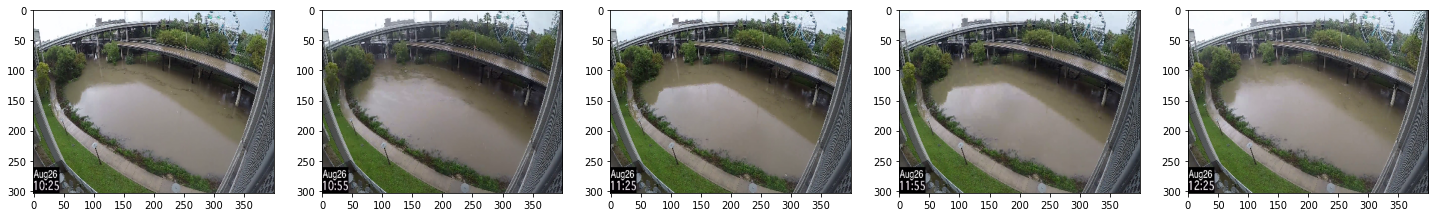

In [8]:
n = 5 # Количество выводимых случайных картинок
fig, axs = plt.subplots(1, n, figsize=(25, 5)) #Создаем полотно из n графиков
for i in range(n): # Выводим в цикле n случайных изображений
  img = xTrain[i+5] # Выбираем случайное фото для отображения
  axs[i].imshow(Image.fromarray(img.astype(np.uint8)))
#   axs[i].imshow(img) # Отображаем фото
plt.show() #Показываем изображения

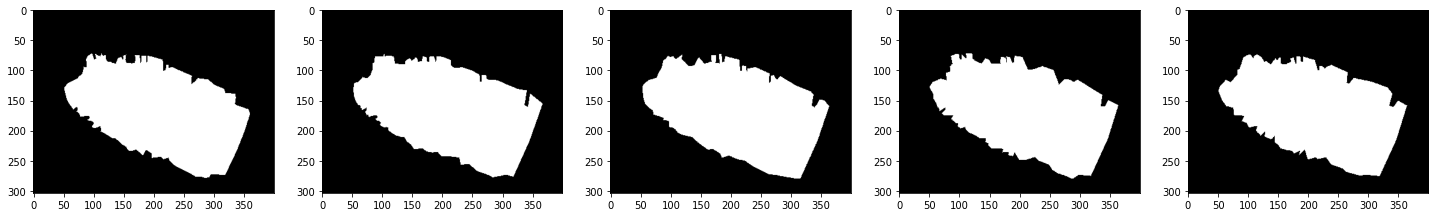

In [9]:
n = 5 # Количество выводимых случайных картинок
fig, axs = plt.subplots(1, n, figsize=(25, 5)) #Создаем полотно из n графиков
for i in range(n): # Выводим в цикле n случайных изображений
  img = annotated_images[i+5] # Выбираем случайное фото для отображения
  axs[i].imshow(img) # Отображаем фото
plt.show() #Показываем изображения

In [10]:
# Функция формирования yTrain
def yt_prep(data, num_classes):
  yTrain = [] # Создаем пустой список под карты сегметации
  for seg in data: # Пробегаем по всем файлам набора с сегминтированными изображениями
    y = image.img_to_array(seg) / 255 # Переводим изображение в numpy-массив размерностью: высота - ширина - количество каналов
    # y = rgbToohe(y, num_classes) # Получаем OHE-представление сформированного массива
    y = np.mean(y, axis=2)[..., None]
    yTrain.append(y) # Добавляем очередной элемент в yTrain
    if len(yTrain) % 100 == 0: # Каждые 100 шагов
      print(len(yTrain)) # Выводим количество обработанных изображений
  return np.array(yTrain) # Возвращаем сформированный yTrain

In [11]:
print(xTrain.shape) # Размерность обучающей выборки

(2000, 304, 400, 3)


In [12]:
cur_time = time.time()
yTrain = yt_prep(annotated_images, num_classes) 
print('Время обработки: ', round(time.time() - cur_time, 2),'c')

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
Время обработки:  9.34 c


In [13]:
yTrain.shape

(2000, 304, 400, 1)

In [14]:
x_train, x_val, y_train, y_val = train_test_split(xTrain, yTrain, test_size = 0.1)

In [15]:
y_train.shape

(1800, 304, 400, 1)

# Модель

In [16]:
'''
  Собственная функция метрики, обрабатывающая пересечение двух областей
'''
def dice_coef(y_true, y_pred):
    return (2. * K.sum(y_true * y_pred) + 1.) / (K.sum(y_true) + K.sum(y_pred) + 1.) # Возвращаем площадь пересечения деленную на площадь объединения двух областей

In [17]:
# U-Net
def build_model(num_classes = 3, input_shape= (88, 120, 3)):
    x = tf.keras.layers.Input(input_shape)
    
    out = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    out1 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(out)
    out = tf.keras.layers.MaxPool2D((2, 2))(out1)

    out = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(out)
    out2 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(out)
    out = tf.keras.layers.MaxPool2D((2, 2))(out2)

    out = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')(out)
    out3 = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')(out)
    out = tf.keras.layers.MaxPool2D((2, 2))(out3)

    out = tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu')(out)
    out4 = tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu')(out)
    out = tf.keras.layers.MaxPool2D((2, 2))(out4)

    out = tf.keras.layers.Conv2D(1024, (3, 3), padding='same', activation='relu')(out)
    out = tf.keras.layers.Conv2D(1024, (3, 3), padding='same', activation='relu')(out)

    out = tf.keras.layers.Conv2DTranspose(512, (3, 3), strides=(2, 2), padding='same', activation='relu')(out)
    out = tf.concat([out4, out], axis=3)

    out = tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu')(out)
    out = tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu')(out)

    out = tf.keras.layers.Conv2DTranspose(256, (3, 3), strides=(2, 2), padding='same', activation='relu')(out)
    out = tf.concat([out3, out], axis=3)

    out = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')(out)
    out = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')(out)

    out = tf.keras.layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same', activation='relu')(out)
    out = tf.concat([out2, out], axis=3)

    out = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(out)
    out = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(out)

    out = tf.keras.layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', activation='relu')(out)
    out = tf.concat([out1, out], axis=3)

    out = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(out)
    out = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(out)
    out = tf.keras.layers.Conv2D(1, (3, 3), padding='same', activation='sigmoid')(out)

    return tf.keras.Model(inputs=x, outputs=out)

model_2 = build_model(2, (304, 400,3))

In [18]:
loss = tf.keras.losses.BinaryCrossentropy()
model_2.compile(optimizer='adam', loss=loss, metrics=[dice_coef])
history = model_2.fit(x_train, y_train, epochs=100, batch_size=16, validation_data = (x_val, y_val)) # Обучаем модель на выборке

Epoch 1/100
113/113 [==============================] - 122s 830ms/step - loss: 1.0418 - dice_coef: 0.2524 - val_loss: 0.5128 - val_dice_coef: 0.2861
Epoch 2/100
113/113 [==============================] - 87s 768ms/step - loss: 0.5181 - dice_coef: 0.2874 - val_loss: 0.5085 - val_dice_coef: 0.2959
Epoch 3/100
113/113 [==============================] - 87s 768ms/step - loss: 0.5583 - dice_coef: 0.2877 - val_loss: 0.5097 - val_dice_coef: 0.2859
Epoch 4/100
113/113 [==============================] - 87s 768ms/step - loss: 0.5145 - dice_coef: 0.2896 - val_loss: 0.5030 - val_dice_coef: 0.3066
Epoch 5/100
113/113 [==============================] - 87s 768ms/step - loss: 0.5109 - dice_coef: 0.2908 - val_loss: 0.4992 - val_dice_coef: 0.3046
Epoch 6/100
113/113 [==============================] - 87s 768ms/step - loss: 0.5000 - dice_coef: 0.3025 - val_loss: 0.4954 - val_dice_coef: 0.2912
Epoch 7/100
113/113 [==============================] - 87s 768ms/step - loss: 0.4977 - dice_coef: 0.3161 - val_

Посмотрим на результаты

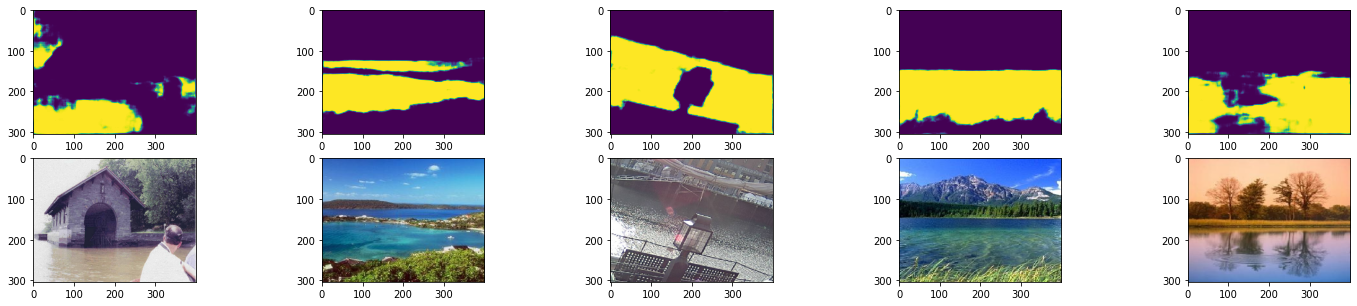

In [54]:
count = 5
n_classes = 2
indexes = np.random.randint(0, len(x_val), count) # Получаем count случайных индексов
fig, axs = plt.subplots(2, count, figsize=(25, 5)) #Создаем полотно из n графиков
for i,idx in enumerate(indexes): # Проходим по всем сгенерированным индексам
  predict = np.array(model_2.predict(x_val[idx].reshape(1, img_width, img_height, 3))) # Предиктим картику
  pr = predict[0] # Берем нулевой элемент из перидкта
  axs[0,i].imshow(pr[:,:,0]) # Отображаем на графике в первой линии
  axs[1,i].imshow(Image.fromarray(x_val[idx].astype('uint8'))) # Отображаем на графике в третьей линии оригинальное изображение        
plt.show() 